# Question 1

*Hint: use `seaborn.snsplot` to visualize data. use `np.corrcoef` to calculate the correlation matrix and use `seaborn.heatmap` to visualize the correlation matrix.*

\[IMPORTANT\] Fill in and use the KMeans code below. DO NOT USE  `sklearn.cluster.KMeans`.

*Hint: To visualize the clusters, you can use `plt.scatter` and set the `c` parameters.*

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

/var/folders/k8/mg372j_55z30k1z4y_8mb0w00000gn/T/ipykernel_97653/3082792822.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
a = np.random.random((5,2))
a

array([[0.73830757, 0.55824301],
       [0.33842134, 0.97297548],
       [0.66256177, 0.7923242 ],
       [0.16796617, 0.12871034],
       [0.57470092, 0.09925532]])

In [3]:
a.shape[0]

5

In [4]:

class KMeans():
    def __init__(self, K, maximum_iters=100):
        # K: number of clusters to be created
        # distance matrix is Eucledian distance
        self.K = K
        self.maximum_iters = maximum_iters
    
    def cluster(self, input_points):
        """ Do KMeans clustering
        input_points: np.array shape(ndata,nfeatures). 
            Each feature is assumed to be normalized within range of [0,1]
        """
        
        # Randomly initialize K centroids, each of which should have the same # of dimensions
        # as the features of the input_points
        # Create an assignment array, where all the input points are assigned to cluster 0
        # Create the first set of new assignments
        
        centroids = np.random.random((self.K, input_points.shape[1]))
        assignments = np.zeros_like(input_points.shape[0])
        new_assignments = self.create_new_assignments(centroids, input_points)

        # print(centroids)
        
        # restart if run into bad initialization
        # Comment out this part for Q1.(d)
        
        # np.unique will filter out all the unique assignments, if at the beginning one of the 
        # clusters is not assigned to, len(np.unique()) will be < K, thus a bad initialization (one dead cluster)
        if len(np.unique(new_assignments))<self.K:
            return self.cluster(input_points)
        
        n_iters = 1
    
        # So long as one of the new_assignments is new, and n_iters is < max_iters
        while (new_assignments != assignments).any() and n_iters < self.maximum_iters:
            ### Compute the centroid given new assignment ###
            
            # New centroid features should be the means of the features of the data points currently
            # assigned to this centroid
            
            # For every centroid
            for i in range(self.K):
                
                # Find the input_points that are assigned to this centroid
                assigned = input_points[new_assignments == i]
                
                # Recalculate the centroid to be the mean of the features of the assigned data points
                # Axis = 0 because we want the mean along the rows, or the mean of the columns (the features)
                centroids[i] = np.mean(assigned, axis = 0)
                # print(centroids)
            
            assignments = new_assignments
            ### Update the assignment with current centroids ###
            new_assignments = self.create_new_assignments(centroids, input_points)
            if len(np.unique(new_assignments))< self.K:
                warnings.warn('At least one centroid vanishes')
            n_iters += 1
            if n_iters == self.maximum_iters:
                print("Warning: Maximum number of iterations reached!")
                
        return new_assignments
            
        
    def create_new_assignments(self, centroids, data_points):
        """ Assign each datapoint to its nearest centroid.
        centroid: 2d array of the current centroid for each cluster
        data_points: 2d arrays recording the features of each data point.
        """
        ###Compute the distances that stores the Eucledian distances between each datapoints and the centroid ###
        #shape (ndata,ncentroid)

        # print(f"Data Points Shape is {data_points.shape}")
        # print(f"Centroids Shape is {centroids.shape}")
        # print(np.linalg.norm(data_points - centroids[0],  axis = 1))

        distance_list = []

        for index in range(len(centroids)):
            this_centroid = centroids[index]
            this_distance =  np.linalg.norm(data_points - this_centroid, axis=1)
            distance_list.append(this_distance)

        # print(distance_list)
        distances = np.array(distance_list).T
        # distances = np.array(distance_list).reshape(data_points.shape[0], -1)
        # print(distances)
        # print(f'distances shape is {distances.shape}')
        
        # Distances will be a 2D matrix. Each row will represent the data point, each column will represent
        # the distance between this data point and the centroid K of the column position (col0 = centroid 0, etc)
        # np.argmin will find the index of the minimum distance along the columns, or for every row.
        
        # np.argmin.shape / new_assignments.shape: (ndata, 1)
        new_assignments = np.argmin(distances, axis=-1)
        # print(new_assignments)
        # print(f'new_assigments shape is {new_assignments.shape}')
        return new_assignments
        
   
        

## (a)

In [5]:
compounds = pd.read_csv("compounds.csv")
compounds.head()

,A,B,C,D,type,Start assignment
0,6.4,2.9,4.3,1.3,amide,1
1,5.7,4.4,1.5,0.4,phenol,2
2,6.7,3.0,5.2,2.3,ether,0
3,5.8,2.8,5.1,2.4,ether,1
4,6.4,3.2,5.3,2.3,ether,0


In [6]:
maxes = {}
for column in compounds.columns[0:4]:
    maxes[column] = compounds[column] / compounds[column].max()
maxes

{'A': 0      0.810127
 1      0.721519
 2      0.848101
 3      0.734177
 4      0.810127
          ...   
 145    0.683544
 146    0.797468
 147    0.759494
 148    0.784810
 149    0.708861
 Name: A, Length: 150, dtype: float64,
 'B': 0      0.659091
 1      1.000000
 2      0.681818
 3      0.636364
 4      0.727273
          ...   
 145    0.886364
 146    0.568182
 147    0.772727
 148    0.659091
 149    0.681818
 Name: B, Length: 150, dtype: float64,
 'C': 0      0.623188
 1      0.217391
 2      0.753623
 3      0.739130
 4      0.768116
          ...   
 145    0.188406
 146    0.724638
 147    0.652174
 148    0.623188
 149    0.594203
 Name: C, Length: 150, dtype: float64,
 'D': 0      0.52
 1      0.16
 2      0.92
 3      0.96
 4      0.92
        ... 
 145    0.16
 146    0.76
 147    0.64
 148    0.52
 149    0.52
 Name: D, Length: 150, dtype: float64}

In [7]:
# compounds_scaled = pd.concat([pd.DataFrame(maxes),compounds.drop(compounds.columns[0:4], axis=1)], axis=1)
compounds_scaled = pd.DataFrame(maxes)
compounds_scaled.head()

,A,B,C,D
0,0.810127,0.659091,0.623188,0.52
1,0.721519,1.000000,0.217391,0.16
2,0.848101,0.681818,0.753623,0.92
3,0.734177,0.636364,0.739130,0.96
4,0.810127,0.727273,0.768116,0.92


In [8]:
compounds_scaled_labeled = pd.concat([compounds_scaled, compounds['type']], axis=1)
compounds_scaled_labeled.head()

,A,B,C,D,type
0,0.810127,0.659091,0.623188,0.52,amide
1,0.721519,1.000000,0.217391,0.16,phenol
2,0.848101,0.681818,0.753623,0.92,ether
3,0.734177,0.636364,0.739130,0.96,ether
4,0.810127,0.727273,0.768116,0.92,ether


In [9]:
# Create dictionary mappings between types and numbers

compounds_types = compounds['type'].unique()
compound_map = {}
for i in range(len(compounds_types)):
    compound_map[compounds_types[i]] = i
display(compound_map)

# Create dictionary mappings between numbers and type

numbers_to_compound = {}
for i in range(len(compounds_types)):
    numbers_to_compound[i] = compounds_types[i]
numbers_to_compound

{'amide': 0, 'phenol': 1, 'ether': 2}

{0: 'amide', 1: 'phenol', 2: 'ether'}

In [10]:
compounds_scaled_labeled['type'] = compounds_scaled_labeled['type'].replace(compound_map)
compounds_scaled_labeled.head()

/var/folders/k8/mg372j_55z30k1z4y_8mb0w00000gn/T/ipykernel_97653/2859537375.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  compounds_scaled_labeled['type'] = compounds_scaled_labeled['type'].replace(compound_map)


,A,B,C,D,type
0,0.810127,0.659091,0.623188,0.52,0
1,0.721519,1.000000,0.217391,0.16,1
2,0.848101,0.681818,0.753623,0.92,2
3,0.734177,0.636364,0.739130,0.96,2
4,0.810127,0.727273,0.768116,0.92,2


In [11]:
# Calculate CorrCoeff matrix for compounds

# Corrcoef takes a matrix where each row is a feature, each column is a data point of that feature
coeffs = np.corrcoef(compounds_scaled_labeled.values.T)
coeffs.shape

(5, 5)

<Axes: >

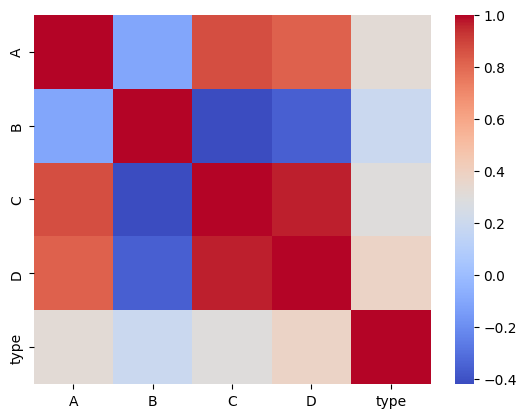

In [12]:
# seaborn vis
sns.heatmap(coeffs, 
            cmap='coolwarm', 
            xticklabels=compounds_scaled_labeled.columns, 
            yticklabels=compounds_scaled_labeled.columns)

<Axes: >

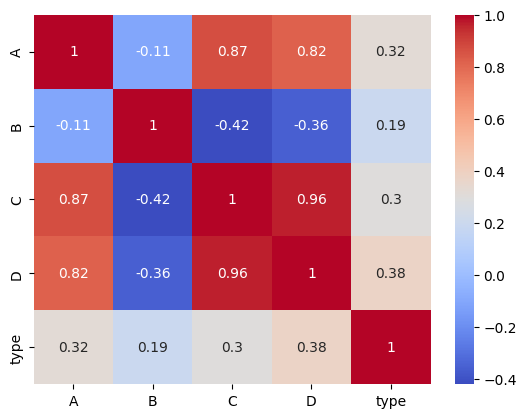

In [13]:
sns.heatmap(coeffs, 
            cmap='coolwarm', 
            xticklabels=compounds_scaled_labeled.columns, 
            yticklabels=compounds_scaled_labeled.columns,
            annot=True
           )

From this correlation coefficient heatmap, it looks like the most correlated feature to type is test D, but only with a correlation coefficien of .38. It looks like test A and C have very little correlation to type, and B has the least correlation with type. Thus, individually, all the tests are only weakly correlated with type. 

A and B are very slightly negatively correlated, and are closer to not being correlated at all. A is pretty positively correlated to C and D. 

B is relatively negatively correlated to C, and a little less strongly negatively correlated to D. However, both of these correlations are still relatively weak.

C is very strongly positively correlated to D, with the highest correlation coefficient in the whole matrix.

## (b)

K_Means for 2, 3, and 4 clusters on the normalized dataset

In [14]:
kmeans_2 = KMeans(2)
kmeans_3 = KMeans(3)
kmeans_4 = KMeans(4)

In [15]:
k2_clusters = kmeans_2.cluster(compounds_scaled)
display(len(k2_clusters))
k2_clusters

150

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [16]:
k3_clusters = kmeans_3.cluster(compounds_scaled)
display(len(k3_clusters))
k3_clusters

150

array([1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 0,
       1, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 2,
       1, 2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 2, 0, 1,
       0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 1])

In [17]:
k4_clusters = kmeans_4.cluster(compounds_scaled)
display(len(k4_clusters))
k4_clusters

150

array([0, 2, 1, 1, 1, 3, 0, 1, 0, 1, 0, 1, 2, 1, 3, 3, 1, 1, 0, 3, 2, 1,
       0, 1, 2, 1, 3, 3, 2, 1, 1, 2, 1, 2, 0, 0, 3, 1, 0, 3, 0, 0, 1, 1,
       2, 0, 1, 1, 1, 1, 3, 0, 1, 1, 1, 0, 1, 0, 1, 3, 3, 0, 3, 0, 1, 2,
       0, 2, 0, 0, 2, 2, 0, 1, 0, 3, 1, 0, 0, 0, 0, 3, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 2, 3, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 3, 3, 2, 2, 0,
       1, 3, 2, 0, 0, 1, 3, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 1, 3, 1, 0,
       1, 0, 1, 1, 3, 0, 2, 0, 1, 2, 0, 3, 0, 2, 1, 0, 0, 0])

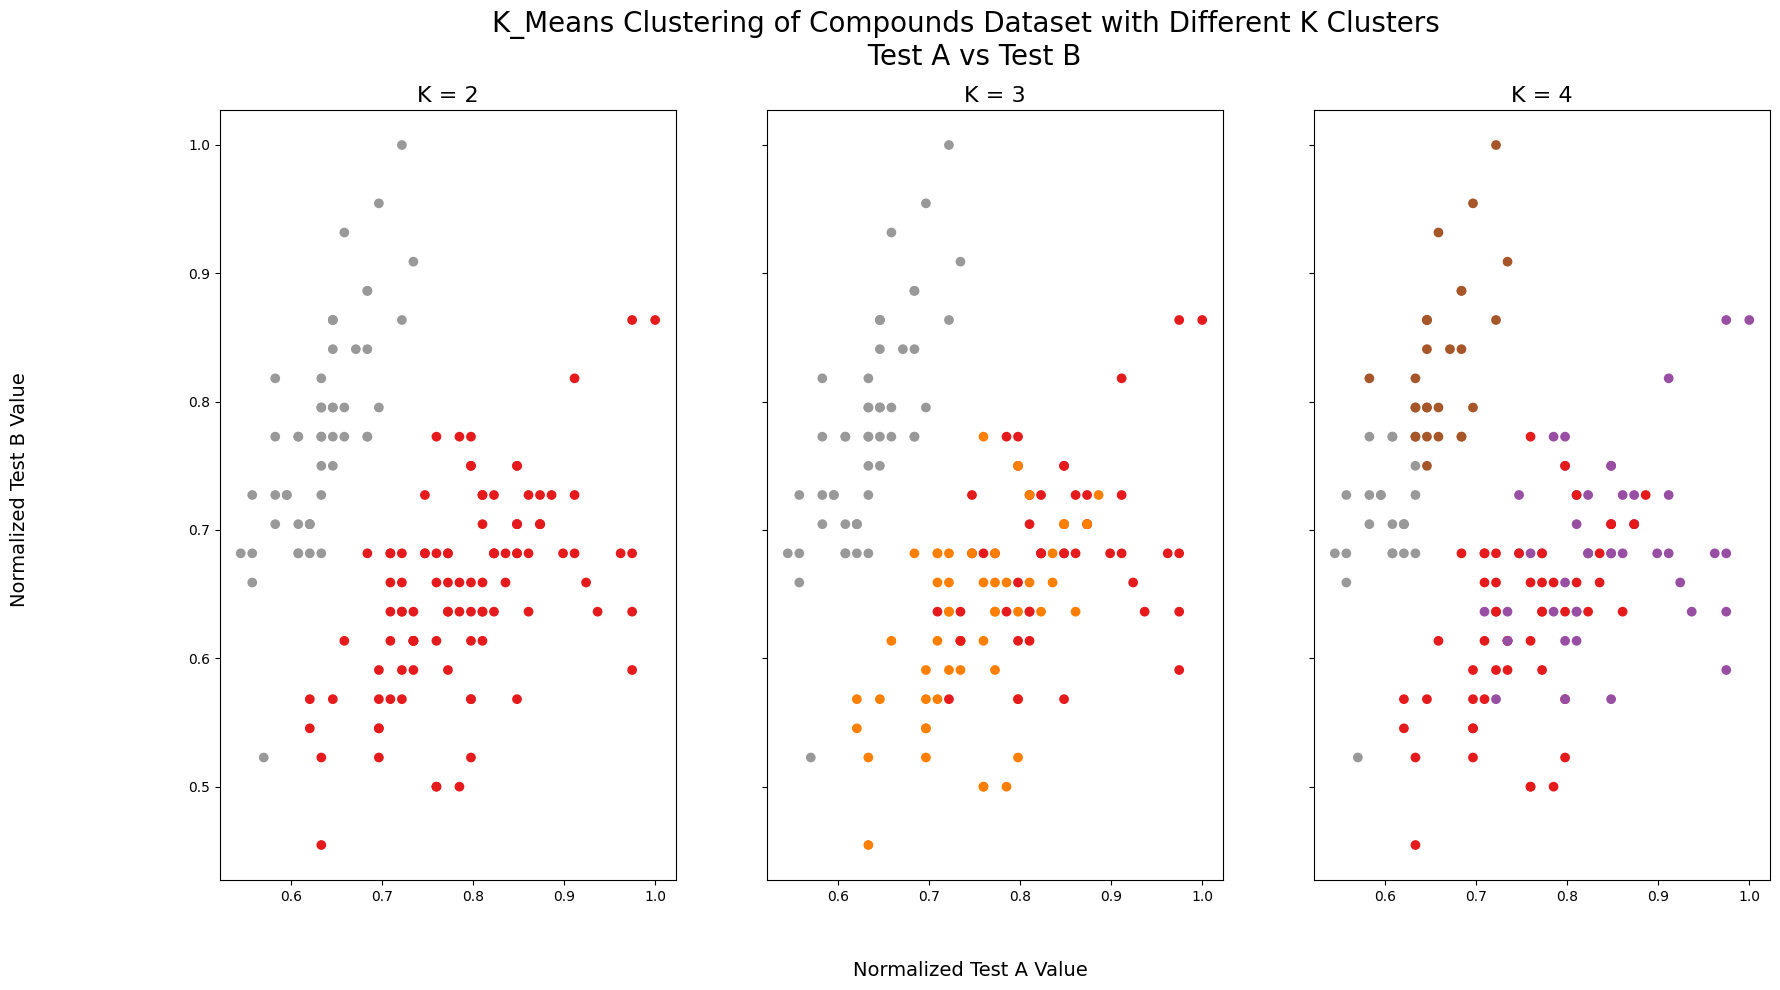

In [18]:
# Visualization of K_Means clustering
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharex='all', sharey='all')
fig.suptitle('K_Means Clustering of Compounds Dataset with Different K Clusters \n Test A vs Test B', 
             fontsize=20)

fig.supxlabel('Normalized Test A Value', fontsize = 14)
fig.supylabel('Normalized Test B Value', fontsize = 14)

# axes[0]: k2
# axes[1]: k3
# axes[2]: k4

# K = 2
axes[0].set_title('K = 2', fontsize=16)
# for color in np.unique(k2_clusters):   
#     axes[0].scatter([], [], label=color)
axes[0].scatter(data=compounds_scaled_labeled, x='A', y='B', c=k2_clusters, cmap='Set1')
# axes[0].legend()

# K = 3
axes[1].set_title('K = 3', fontsize=16)
axes[1].scatter(data=compounds_scaled_labeled, x='A', y='B', c=k3_clusters, cmap='Set1')

# K = 4
axes[2].set_title('K = 4', fontsize=16)
axes[2].scatter(data=compounds_scaled_labeled, x='A', y='B', c=k4_clusters, cmap='Set1')

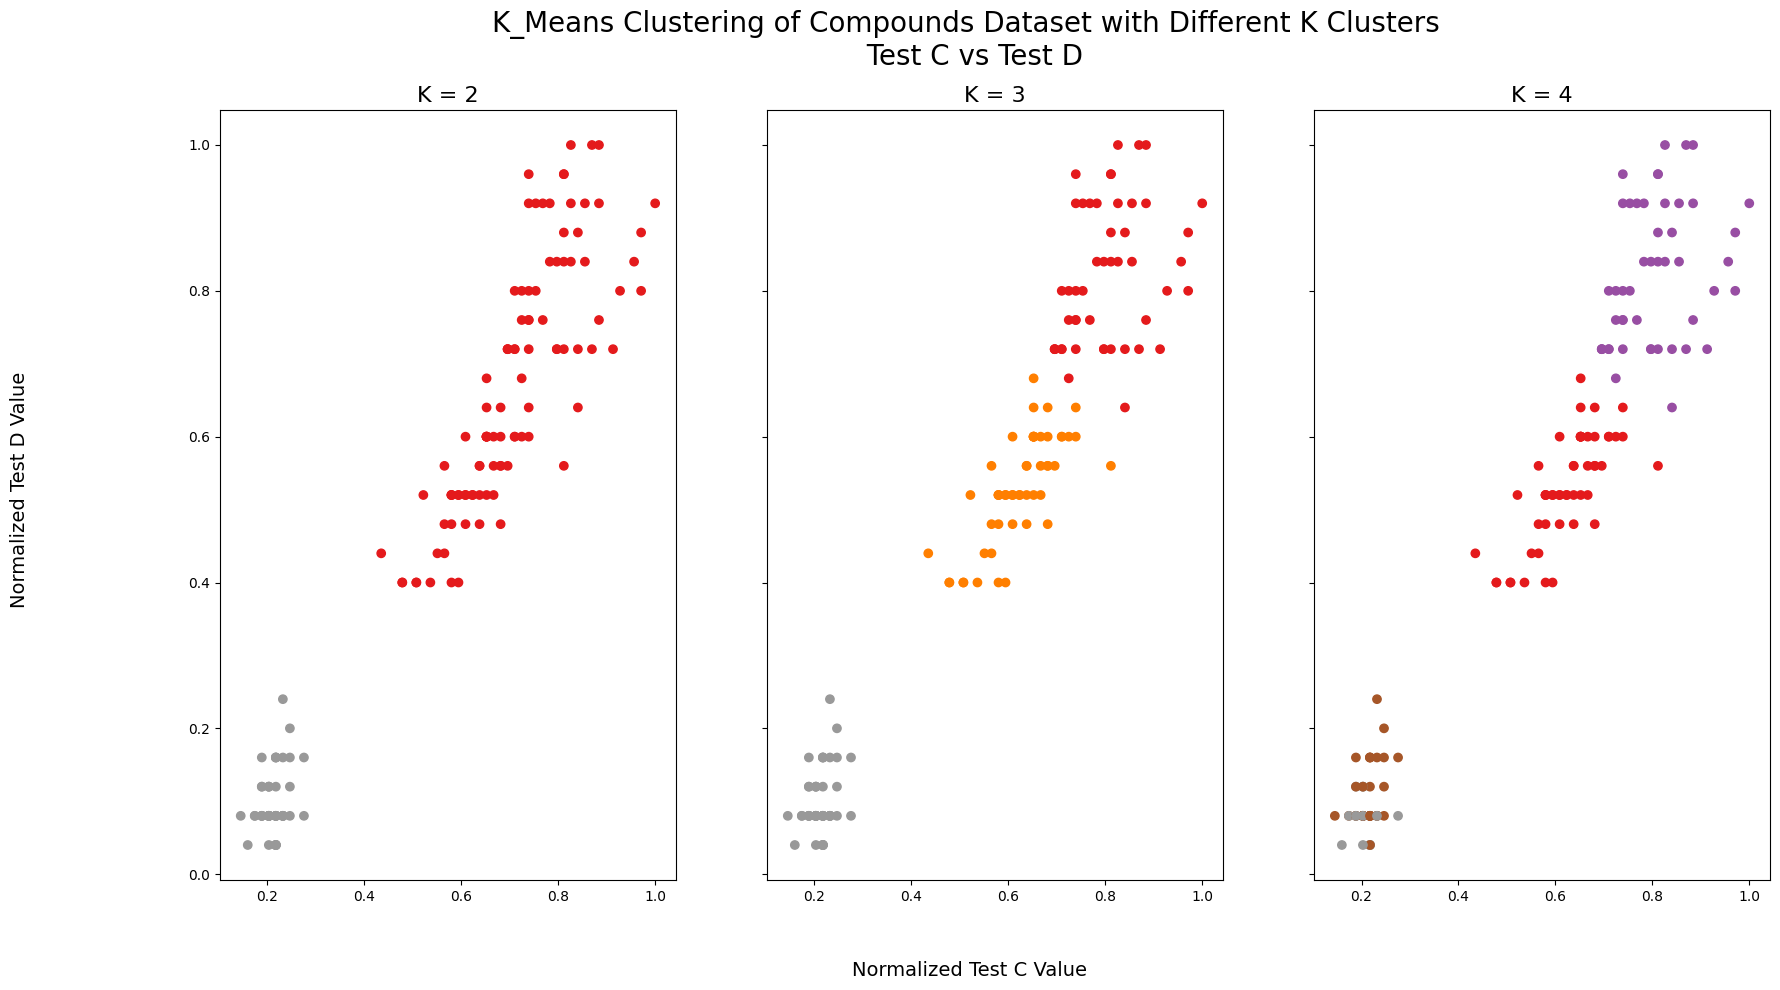

In [19]:
# Visualization of K_Means clustering Test C vs Test D
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharex='all', sharey='all')
fig.suptitle('K_Means Clustering of Compounds Dataset with Different K Clusters \n Test C vs Test D', 
             fontsize=20)

fig.supxlabel('Normalized Test C Value', fontsize = 14)
fig.supylabel('Normalized Test D Value', fontsize = 14)

# axes[0]: k2
# axes[1]: k3
# axes[2]: k4

# K = 2
axes[0].set_title('K = 2', fontsize=16)
# for color in np.unique(k2_clusters):   
#     axes[0].scatter([], [], label=color)
axes[0].scatter(data=compounds_scaled_labeled, x='C', y='D', c=k2_clusters, cmap='Set1')
# axes[0].legend()

# K = 3
axes[1].set_title('K = 3', fontsize=16)
axes[1].scatter(data=compounds_scaled_labeled, x='C', y='D', c=k3_clusters, cmap='Set1')

# K = 4
axes[2].set_title('K = 4', fontsize=16)
axes[2].scatter(data=compounds_scaled_labeled, x='C', y='D', c=k4_clusters, cmap='Set1')

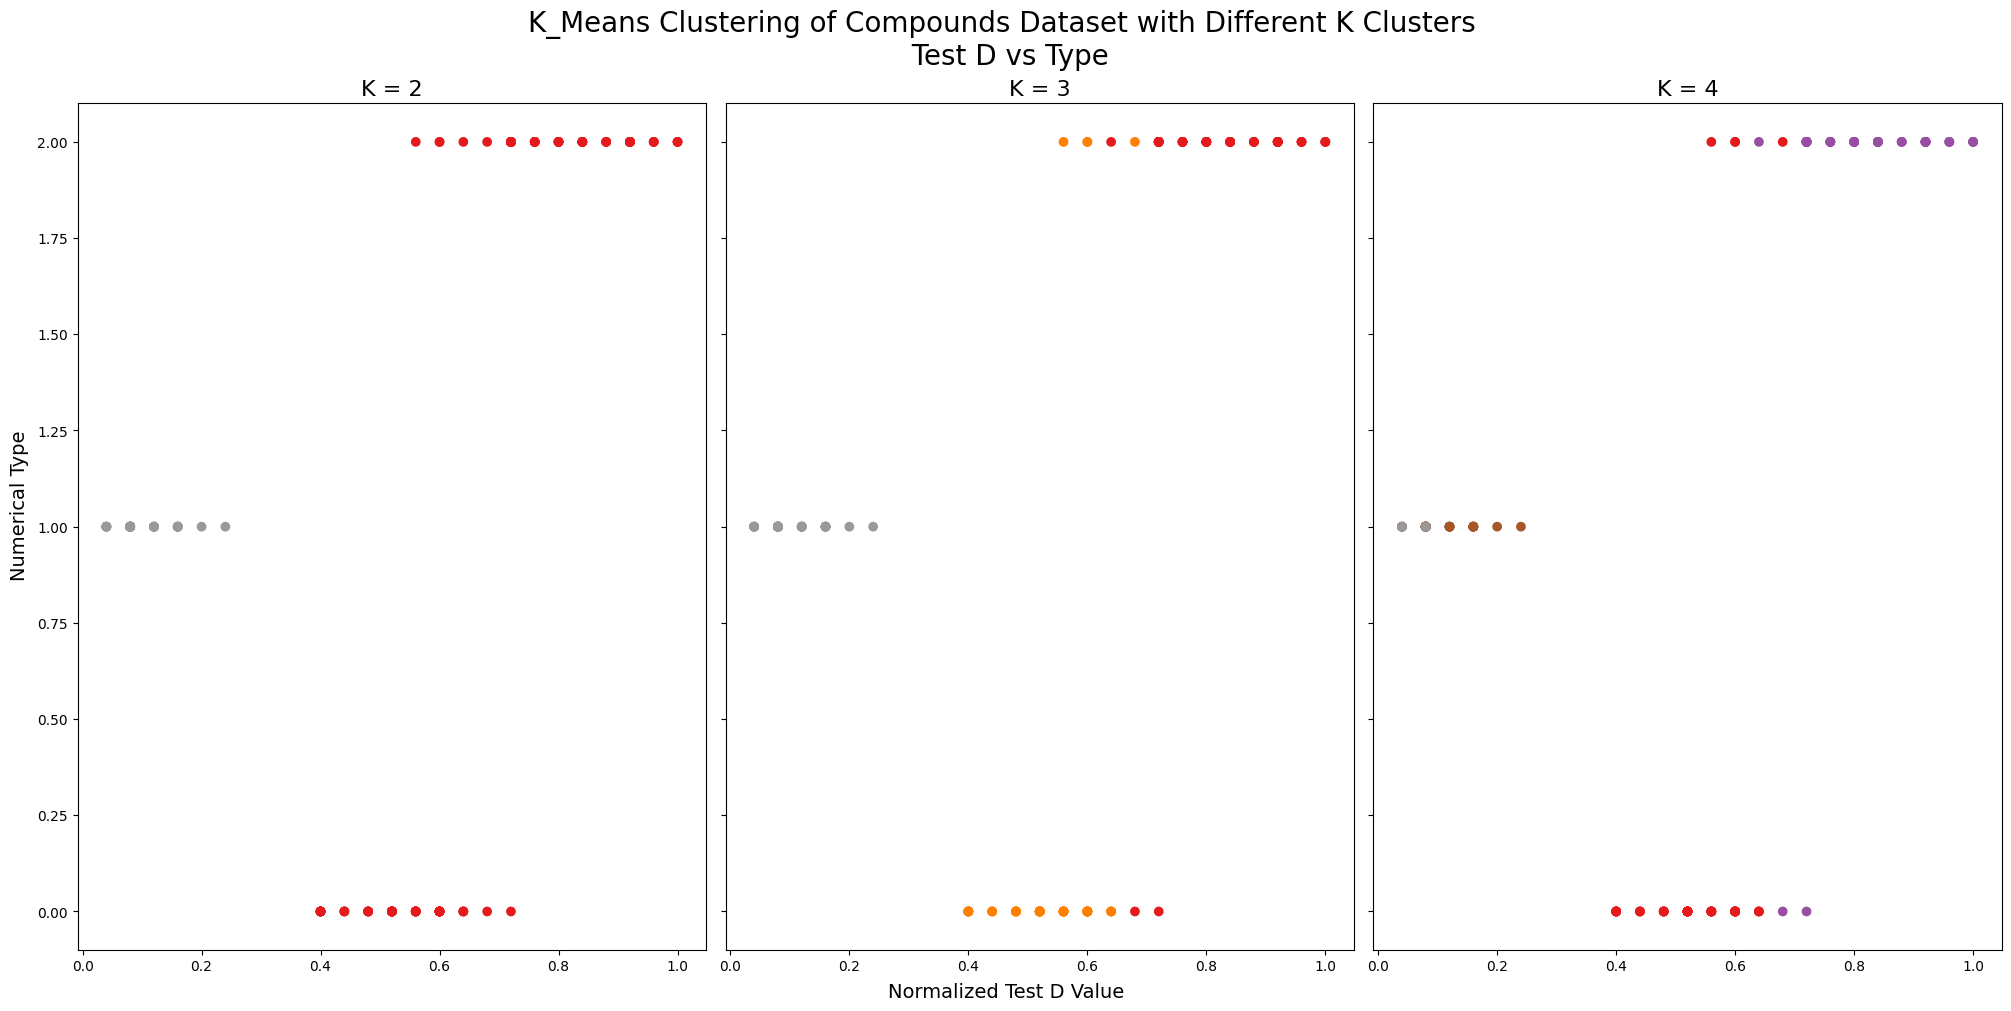

In [20]:
# Visualization of K_Means clustering Test D vs Type
fig, axes = plt.subplots(1, 3, figsize=(20, 10), layout='constrained', sharex='all', sharey='all')
fig.suptitle('K_Means Clustering of Compounds Dataset with Different K Clusters \n Test D vs Type', 
             fontsize=20)

fig.supxlabel('Normalized Test D Value', fontsize = 14)
fig.supylabel('Numerical Type', fontsize = 14)

# axes[0]: k2
# axes[1]: k3
# axes[2]: k4

# K = 2
axes[0].set_title('K = 2', fontsize=16)
# for color in np.unique(k2_clusters):   
#     axes[0].scatter([], [], label=color)
axes[0].scatter(data=compounds_scaled_labeled, x='D', y='type', c=k2_clusters, cmap='Set1')
# axes[0].legend()

# K = 3
axes[1].set_title('K = 3', fontsize=16)
axes[1].scatter(data=compounds_scaled_labeled, x='D', y='type', c=k3_clusters, cmap='Set1')

# K = 4
axes[2].set_title('K = 4', fontsize=16)
axes[2].scatter(data=compounds_scaled_labeled, x='D', y='type', c=k4_clusters, cmap='Set1')

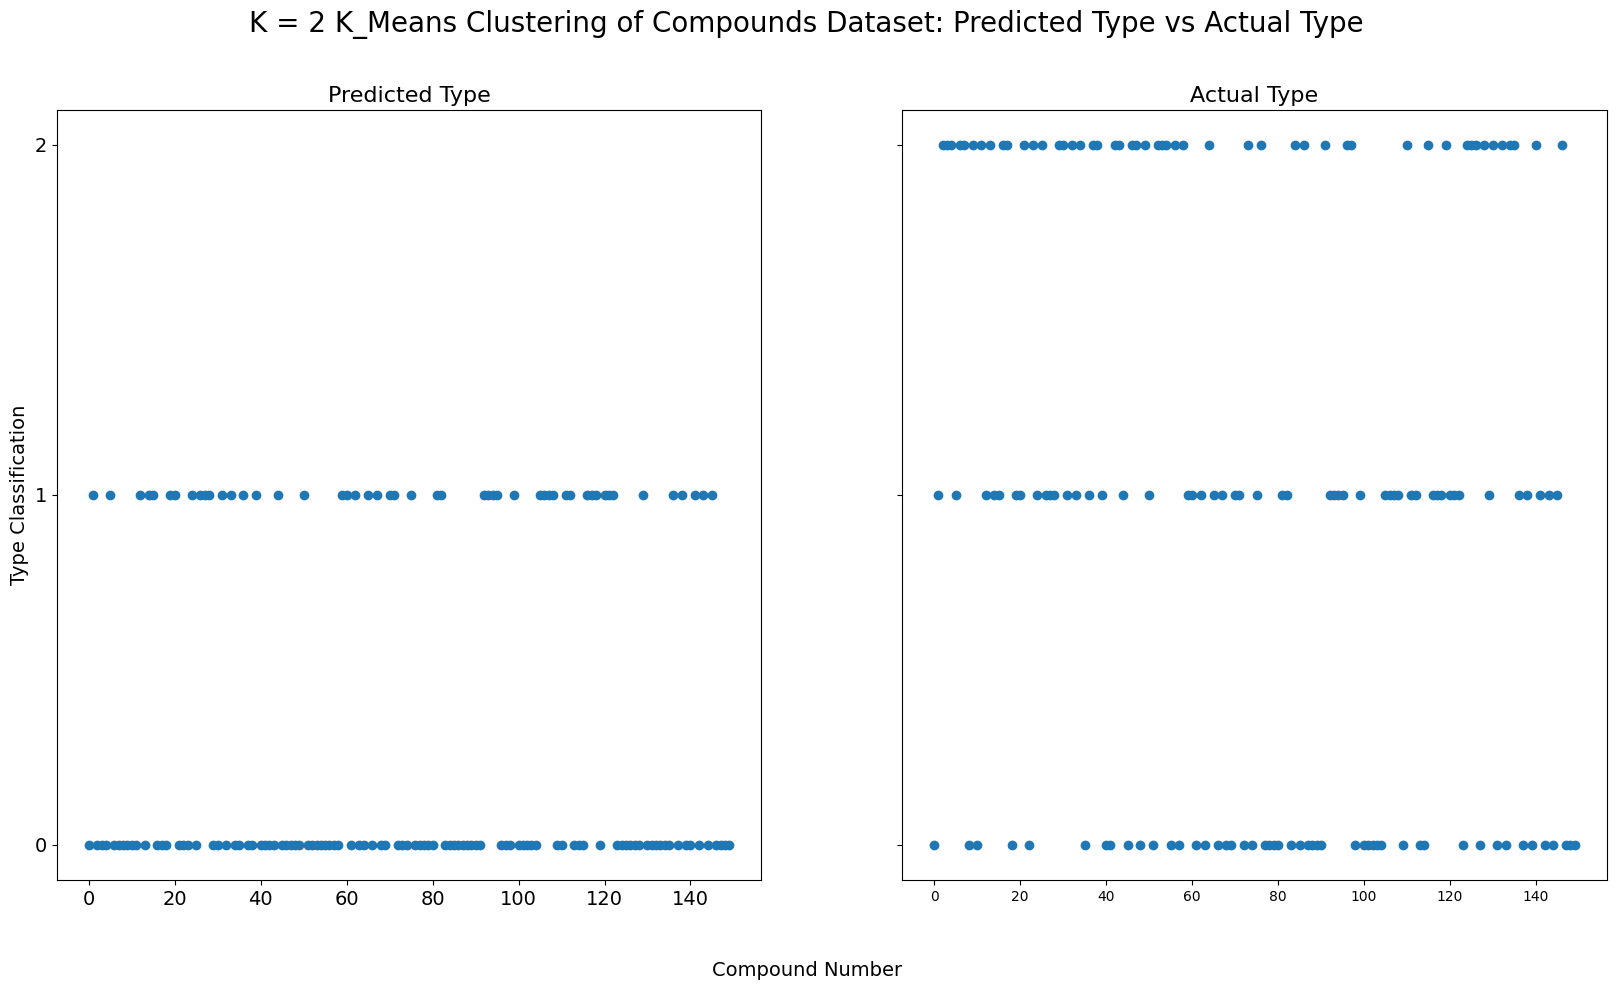

In [21]:
# Visualization of K_Means clustering Predicted Type vs Actual Type
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex='all', sharey='all')
fig.suptitle('K = 2 K_Means Clustering of Compounds Dataset: Predicted Type vs Actual Type', 
             fontsize=20)

fig.supxlabel('Compound Number', fontsize = 14)
# fig.supx
# fig.supylabel('Type Classification', fontsize = 14)

# Predicted Type
axes[0].set_title('Predicted Type', fontsize=16)
axes[0].scatter(x=compounds_scaled_labeled.index, y=k2_clusters)
axes[0].set_ylabel('Type Classification', fontsize = 14)
axes[0].set_yticks([0, 1, 2])
axes[0].tick_params(labelsize=14)

# Actual Type
axes[1].set_title('Actual Type', fontsize=16)
axes[1].scatter(x=compounds_scaled_labeled.index, y=compounds_scaled_labeled['type'])

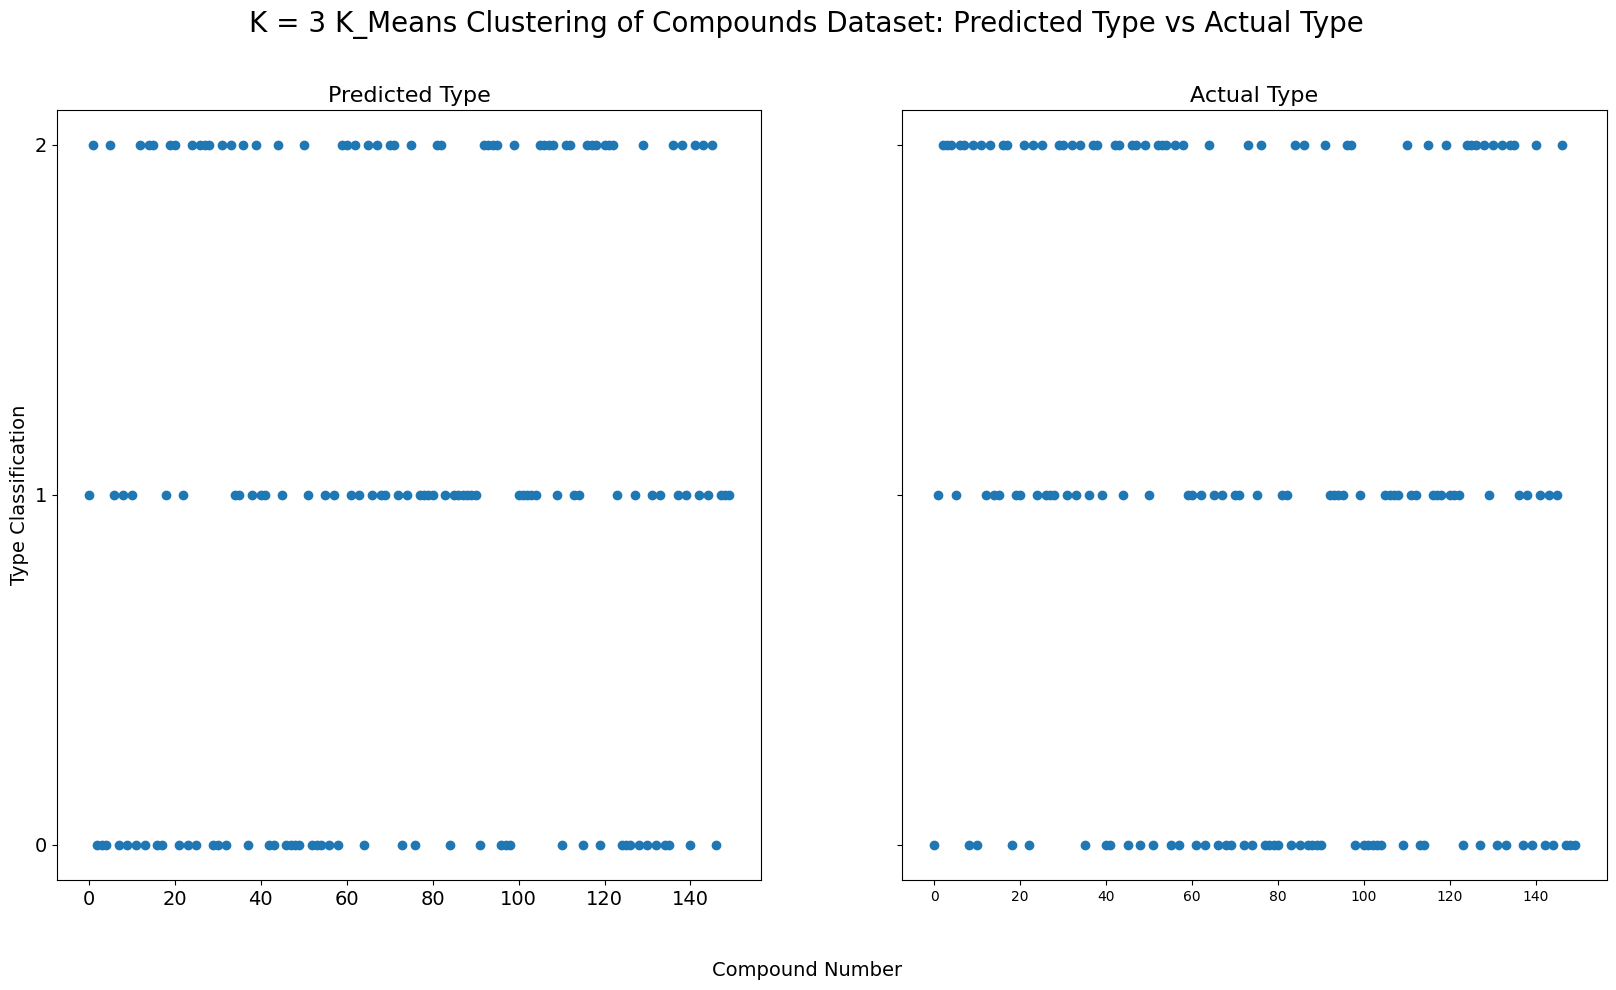

In [22]:
# Visualization of K_Means clustering Predicted Type vs Actual Type
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex='all', sharey='all')
fig.suptitle('K = 3 K_Means Clustering of Compounds Dataset: Predicted Type vs Actual Type', 
             fontsize=20)

fig.supxlabel('Compound Number', fontsize = 14)
# fig.supx
# fig.supylabel('Type Classification', fontsize = 14)

# Predicted Type
axes[0].set_title('Predicted Type', fontsize=16)
axes[0].scatter(x=compounds_scaled_labeled.index, y=k3_clusters)
axes[0].set_ylabel('Type Classification', fontsize = 14)
axes[0].set_yticks([0, 1, 2])
axes[0].tick_params(labelsize=14)

# Actual Type
axes[1].set_title('Actual Type', fontsize=16)
axes[1].scatter(x=compounds_scaled_labeled.index, y=compounds_scaled_labeled['type'])

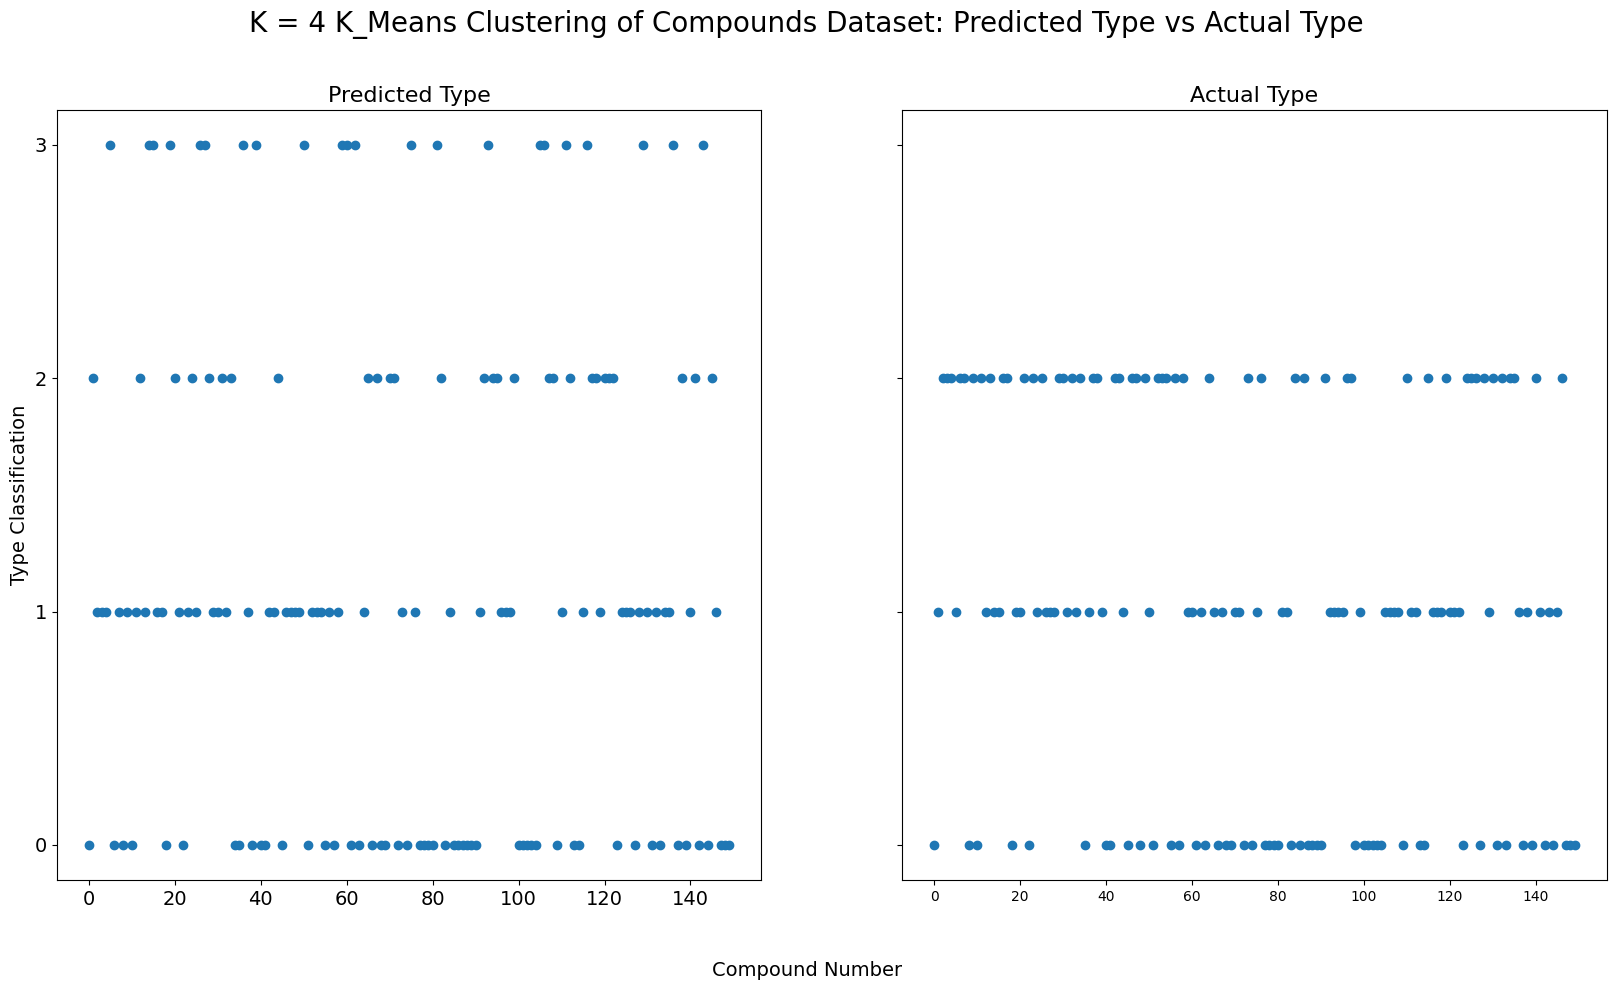

In [23]:
# Visualization of K_Means clustering Predicted Type vs Actual Type
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex='all', sharey='all')
fig.suptitle('K = 4 K_Means Clustering of Compounds Dataset: Predicted Type vs Actual Type', 
             fontsize=20)

fig.supxlabel('Compound Number', fontsize = 14)
# fig.supx
# fig.supylabel('Type Classification', fontsize = 14)

# Predicted Type
axes[0].set_title('Predicted Type', fontsize=16)
axes[0].scatter(x=compounds_scaled_labeled.index, y=k4_clusters)
axes[0].set_ylabel('Type Classification', fontsize = 14)
axes[0].set_yticks([0, 1, 2, 3])
axes[0].tick_params(labelsize=14)

# Actual Type
axes[1].set_title('Actual Type', fontsize=16)
axes[1].scatter(x=compounds_scaled_labeled.index, y=compounds_scaled_labeled['type'])

Based on our visualization, obviously we know that there should be 3 final classes. So when plotting the predicted types versus the actual types, the plotting using K=3 for KMeans looks the most similar to the Actual Type graph. When plotting features versus other features, there is obvious clustering going on as well. When plotting Test A vs Test B, and Test C vs Test D, it also appears the K = 3 is the best form of clustering. K=4 infers additional clusters that don't appear to be there, and K=2 perhaps simplifies the clusters too much. However, in the Test C vs Test D plotting, K=2 does appear to make the most sense for clustering because it appears there are two distinct groups. However, K=3 finds another cluster at the very bottom, distinguishing further.

So K=3 is the best choice according to the visualization.

## (c)

Validate function for computing the accuracy of prediction

In [24]:
def validate(y_pred,y):
    """print accuracy of prediction for each class for the compounds dataset
    y_pred: np.array shape(ndata). Your prediction of classes
    y: np.array of str shape(ndata). data labels / ground truths.
    """
    # correct classification
    compounds = np.unique(y) # should be ['amide','phenol','ether'] for compounds dataset
    clusters =[np.where((y==c)) for c in compounds]
    pred_class = np.unique(y_pred)
    
    #remove -1 for noise point in DBSCAN
    pred_class= np.delete(pred_class,np.where(pred_class==-1))
    assert len(pred_class) == len(compounds), f'y_pred has less or more than {len(compounds)} classes:{pred_class}'

    for i in range(3):
        #loop over solutions
        counts=[]
        scores=[]
        for j in range(3):
            #loop over clusters of true assignments
            sol_i= np.where((y_pred==pred_class[i]))
            counts.append(len(np.intersect1d(sol_i, clusters[j])))
            scores.append(counts[-1]/len(clusters[j]))
        idx = np.argmax(scores)
        print(f'Class {pred_class[i]} - {compounds[idx]}: {counts[idx]} out \
of {np.count_nonzero(clusters[idx])} are classified correctly')

In [25]:
predicted_classes = (pd.Series(k3_clusters).replace(numbers_to_compound).to_numpy())
actual_classes = compounds['type'].to_numpy()
actual_classes

array(['amide', 'phenol', 'ether', 'ether', 'ether', 'phenol', 'ether',
       'ether', 'amide', 'ether', 'amide', 'ether', 'phenol', 'ether',
       'phenol', 'phenol', 'ether', 'ether', 'amide', 'phenol', 'phenol',
       'ether', 'amide', 'ether', 'phenol', 'ether', 'phenol', 'phenol',
       'phenol', 'ether', 'ether', 'phenol', 'ether', 'phenol', 'ether',
       'amide', 'phenol', 'ether', 'ether', 'phenol', 'amide', 'amide',
       'ether', 'ether', 'phenol', 'amide', 'ether', 'ether', 'amide',
       'ether', 'phenol', 'amide', 'ether', 'ether', 'ether', 'amide',
       'ether', 'amide', 'ether', 'phenol', 'phenol', 'amide', 'phenol',
       'amide', 'ether', 'phenol', 'amide', 'phenol', 'amide', 'amide',
       'phenol', 'phenol', 'amide', 'ether', 'amide', 'phenol', 'ether',
       'amide', 'amide', 'amide', 'amide', 'phenol', 'phenol', 'amide',
       'ether', 'amide', 'ether', 'amide', 'amide', 'amide', 'amide',
       'ether', 'phenol', 'phenol', 'phenol', 'phenol', 'ether'

In [26]:
validate(predicted_classes, actual_classes)

Class amide - ether: 46 out of 50 are classified correctly
Class ether - phenol: 50 out of 50 are classified correctly
Class phenol - amide: 48 out of 49 are classified correctly


The classification works quite well, as 46/50 amide-ether are predicted correctly, all 50 ether-phenols are predicted correctly, and 46/50 phenol-ethers are predicted correctly. The K_Means clustering algorithm is working!

## (d)

In [27]:

class KMeans():
    def __init__(self, K, maximum_iters=100):
        # K: number of clusters to be created
        # distance matrix is Eucledian distance
        self.K = K
        self.maximum_iters = maximum_iters
    
    def cluster(self, input_points):
        """ Do KMeans clustering
        input_points: np.array shape(ndata,nfeatures). 
            Each feature is assumed to be normalized within range of [0,1]
        """
        
        # Randomly initialize K centroids, each of which should have the same # of dimensions
        # as the features of the input_points
        # Create an assignment array, where all the input points are assigned to cluster 0
        # Create the first set of new assignments
        
        centroids = np.random.random((self.K, input_points.shape[1]))
        assignments = np.zeros_like(input_points.shape[0])
        new_assignments = self.create_new_assignments(centroids, input_points)

        # print(centroids)
        
        # restart if run into bad initialization
        # Comment out this part for Q1.(d)
        
        # np.unique will filter out all the unique assignments, if at the beginning one of the 
        # clusters is not assigned to, len(np.unique()) will be < K, thus a bad initialization (one dead cluster)
        # if len(np.unique(new_assignments))<self.K:
        #     return self.cluster(input_points)
        
        n_iters = 1
    
        # So long as one of the new_assignments is new, and n_iters is < max_iters
        while (new_assignments != assignments).any() and n_iters < self.maximum_iters:
            ### Compute the centroid given new assignment ###
            
            # New centroid features should be the means of the features of the data points currently
            # assigned to this centroid
            
            # For every centroid
            for i in range(self.K):
                
                # Find the input_points that are assigned to this centroid
                assigned = input_points[new_assignments == i]
                
                # Recalculate the centroid to be the mean of the features of the assigned data points
                # Axis = 0 because we want the mean along the rows, or the mean of the columns (the features)
                centroids[i] = np.mean(assigned, axis = 0)
                # print(centroids)
            
            assignments = new_assignments
            ### Update the assignment with current centroids ###
            new_assignments = self.create_new_assignments(centroids, input_points)
            if len(np.unique(new_assignments))< self.K:
                warnings.warn('At least one centroid vanishes')
            n_iters += 1
            if n_iters == self.maximum_iters:
                print("Warning: Maximum number of iterations reached!")
                
        return new_assignments
            
        
    def create_new_assignments(self, centroids, data_points):
        """ Assign each datapoint to its nearest centroid.
        centroid: 2d array of the current centroid for each cluster
        data_points: 2d arrays recording the features of each data point.
        """
        ###Compute the distances that stores the Eucledian distances between each datapoints and the centroid ###
        #shape (ndata,ncentroid)

        # print(f"Data Points Shape is {data_points.shape}")
        # print(f"Centroids Shape is {centroids.shape}")
        # print(np.linalg.norm(data_points - centroids[0],  axis = 1))

        distance_list = []

        for index in range(len(centroids)):
            this_centroid = centroids[index]
            this_distance =  np.linalg.norm(data_points - this_centroid, axis=1)
            distance_list.append(this_distance)

        # print(distance_list)
        distances = np.array(distance_list).T
        # distances = np.array(distance_list).reshape(data_points.shape[0], -1)
        # print(distances)
        # print(f'distances shape is {distances.shape}')
        
        # Distances will be a 2D matrix. Each row will represent the data point, each column will represent
        # the distance between this data point and the centroid K of the column position (col0 = centroid 0, etc)
        # np.argmin will find the index of the minimum distance along the columns, or for every row.
        
        # np.argmin.shape / new_assignments.shape: (ndata, 1)
        new_assignments = np.argmin(distances, axis=-1)
        # print(new_assignments)
        # print(f'new_assigments shape is {new_assignments.shape}')
        return new_assignments
        
   
        

In [28]:
ntrials = 100
count = 0
for i in range(ntrials):
    kmeans = KMeans(4) # Comment out the re-init code in KMeans
    # results = kmeans.cluster(compounds.drop(['type', 'Start assignment'], axis=1))
    results = kmeans.cluster(compounds_scaled)
    if len(np.unique(results)) == 4:
        count += 1
print(f'Out of {ntrials} number of KMeans trials, only {count} gives 4 clusters')

/var/folders/k8/mg372j_55z30k1z4y_8mb0w00000gn/T/ipykernel_97653/643197270.py:57: UserWarning: At least one centroid vanishes
  warnings.warn('At least one centroid vanishes')


Out of 100 number of KMeans trials, only 20 gives 4 clusters


Without re-initialization, often times the initial choice of clusters is sub-optimal, and perhaps no data points are ever assigned to that cluster. This is why we get the warning that centroids are disappearing, along with the fact that only 20 out of the 100 trials properly gives 4 clusters. Thus, initial centroid positional choice is important to ensure that all clusters are initialized with data points. If there are initial clusters without data points, it is critical that they are re-initialized to have data points, otherwise the centroid will disappear in the first iteration of the algorithm.

# Question 2

## (a)

*Hint*:
+ Use `sklearn.cluster.DBSCAN` and adjust `eps`(Rcut) and `min_samples`(MinPts) parameters.**
+ Core points are stored in `core_sample_indices_` attribute.
+ Cluster results are stored in `labels_` attribute and noise points are labeled as -1.


Testing for various values of eps and min_samples. Since our values are scaled between [0, 1], and we have 4 dimensions, we should use this information as starting points for optimizing epsilon and min_samples. Generally, min_samples = 2*dimensions is a good starting point (from online reading). However, our data set is relatively small (only 150 samples). Therefore, so long as min_samples >= dimensions, we should be okay. 

In [163]:
from sklearn.cluster import DBSCAN

In [155]:
db = DBSCAN(eps=0.05, min_samples=4)
db.fit(compounds_scaled.to_numpy())
# Cluster labels for each point in the dataset given to fit().  Noisy samples are given the label -1.
display(db.labels_)
# Indices of core samples.
# db.core_sample_indices_

# Number of clusters in labels, ignoring noise if present.
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_core = len(db.core_sample_indices_)
n_border = len(compounds_scaled) - n_core - n_noise_

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Estimated number of core points: {n_core}")
print(f"Estimated number of border points: {n_border}")
validate(labels, actual_classes)

array([-1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1,
       -1, -1,  0,  0,  1, -1, -1, -1, -1,  0,  0, -1, -1, -1,  0, -1, -1,
       -1, -1,  0,  1, -1, -1, -1, -1, -1,  1,  0,  2, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1,  0, -1, -1,
       -1,  2, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  0,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0, -1, -1, -1,  0,  0, -1,
       -1,  0,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  2, -1, -1,
        0, -1, -1,  2, -1,  0,  2,  0, -1, -1, -1, -1, -1,  2])

Estimated number of clusters: 3
Estimated number of noise points: 106
Estimated number of core points: 30
Estimated number of border points: 14
Class 0 - phenol: 33 out of 50 are classified correctly
Class 1 - ether: 4 out of 50 are classified correctly
Class 2 - amide: 6 out of 49 are classified correctly


In [145]:
db = DBSCAN(eps=0.08025, min_samples=8)
db.fit(compounds_scaled.to_numpy())
# Cluster labels for each point in the dataset given to fit().  Noisy samples are given the label -1.
display(db.labels_)
# Indices of core samples.
# db.core_sample_indices_

# Number of clusters in labels, ignoring noise if present.
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_core = len(db.core_sample_indices_)
n_border = len(compounds_scaled) - n_core - n_noise_

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Estimated number of core points: {n_core}")
print(f"Estimated number of border points: {n_border}")
validate(labels, actual_classes)

array([ 0, -1, -1, -1, -1,  1, -1, -1,  0,  2,  0, -1, -1, -1,  1,  1, -1,
        2,  0,  1,  1, -1, -1, -1,  1,  2,  1,  1,  1, -1, -1,  1,  2, -1,
       -1, -1,  1, -1,  0,  1,  0,  0, -1, -1,  1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1,  0, -1,  1,  1,  0,  1,  0,  2,  1,  0,  1,
       -1,  0, -1,  1,  0, -1, -1,  1, -1,  0,  0,  0, -1,  1,  1, -1, -1,
        0, -1,  0,  0,  0,  0, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  0,
       -1, -1,  0,  1,  1,  1,  1,  0, -1,  1,  1, -1,  0,  2,  1,  1,  1,
       -1,  1,  1,  1,  0, -1, -1, -1, -1,  2,  1,  2,  0, -1,  0, -1, -1,
        1,  0,  1,  0, -1,  1,  0,  1, -1,  1, -1, -1,  0,  0])

Estimated number of clusters: 3
Estimated number of noise points: 64
Estimated number of core points: 51
Estimated number of border points: 35
Class 0 - amide: 34 out of 49 are classified correctly
Class 1 - phenol: 43 out of 50 are classified correctly
Class 2 - ether: 8 out of 50 are classified correctly


In [187]:
db = DBSCAN(eps=0.0885, min_samples=4)
db.fit(compounds_scaled.to_numpy())
# Cluster labels for each point in the dataset given to fit().  Noisy samples are given the label -1.
display(db.labels_)
# Indices of core samples.
# db.core_sample_indices_

# Number of clusters in labels, ignoring noise if present.
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_core = len(db.core_sample_indices_)
n_border = len(compounds_scaled) - n_core - n_noise_

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Estimated number of core points: {n_core}")
print(f"Estimated number of border points: {n_border}")
validate(labels, actual_classes)

array([ 0, -1,  0, -1,  0,  1, -1,  0,  0,  0,  0, -1, -1,  0,  1,  1,  0,
        0,  0,  1,  1,  0, -1,  0,  1,  0,  1,  1,  1,  0, -1,  1,  0,  1,
        0, -1,  1,  0,  0,  1,  0,  0, -1,  0,  1,  0,  0,  0,  0, -1, -1,
        0,  0, -1,  0,  0, -1,  0,  0,  1,  1,  0,  1,  0,  0,  1,  0,  1,
        0,  0, -1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  2,  1,  1,  2,  0,
        0, -1,  0,  0,  0,  0, -1,  1,  1,  1,  1,  0,  0,  0,  1,  2,  0,
        0,  0,  0,  1,  1,  1,  1,  0, -1,  1,  1, -1,  0,  0,  1,  1,  1,
       -1,  1,  1,  1,  0, -1, -1,  0,  2,  0,  1,  0,  0,  0,  0,  0, -1,
        1,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0])

Estimated number of clusters: 3
Estimated number of noise points: 22
Estimated number of core points: 116
Estimated number of border points: 12
Class 0 - amide: 43 out of 49 are classified correctly
Class 1 - phenol: 46 out of 50 are classified correctly
Class 2 - amide: 4 out of 49 are classified correctly


In [164]:
db = DBSCAN(eps=0.092, min_samples=5)
db.fit(compounds_scaled.to_numpy())
# Cluster labels for each point in the dataset given to fit().  Noisy samples are given the label -1.
display(db.labels_)
# Indices of core samples.
# db.core_sample_indices_

# Number of clusters in labels, ignoring noise if present.
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_core = len(db.core_sample_indices_)
n_border = len(compounds_scaled) - n_core - n_noise_

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Estimated number of core points: {n_core}")
print(f"Estimated number of border points: {n_border}")
validate(labels, actual_classes)

array([ 0, -1,  1, -1,  1,  2, -1,  1,  0,  1,  0, -1, -1,  1,  2,  2,  1,
        1,  0,  2,  2,  1,  0,  1,  2,  1,  2,  2,  2,  1, -1,  2,  1,  2,
        0,  0,  2,  1,  0,  2,  0,  0, -1,  1,  2,  0,  1,  1,  0, -1, -1,
        0,  1, -1,  1,  0, -1,  0,  1,  2,  2,  0,  2,  0,  1,  2,  0,  2,
        0,  0, -1,  2,  0,  1,  0,  2,  1,  0,  0,  0,  0,  2,  2,  0,  1,
        0, -1,  0,  0,  0,  0, -1,  2,  2,  2,  2,  1,  1,  1,  2,  0,  0,
        0,  0,  0,  2,  2,  2,  2,  0, -1,  2,  2, -1,  0,  1,  2,  2,  2,
       -1,  2,  2,  2,  0, -1, -1,  1,  0,  1,  2,  1,  0,  1,  0,  1, -1,
        2,  0,  2,  0,  1,  2,  0,  2,  0,  2,  1,  0,  0,  0])

Estimated number of clusters: 3
Estimated number of noise points: 20
Estimated number of core points: 108
Estimated number of border points: 22
Class 0 - amide: 48 out of 49 are classified correctly
Class 1 - ether: 33 out of 50 are classified correctly
Class 2 - phenol: 46 out of 50 are classified correctly


Depending on the parameters chosen, DBSCAN can still perform admirably. For certain parameters, the number of noise points can be significantly larger, and the number of core and border points can also change. Compared to K_Means, which classifies most everything perfectly, DBSCAN with the best parameters that I found still classifies less correctly. Thus, K_Means outperforms DBSCAN for this dataset.

**Utilize K Nearest Neigbors algorithm to optimize epsilon for a given min_samples:**

The number of nearest neigbors is the same value you use for min_samples

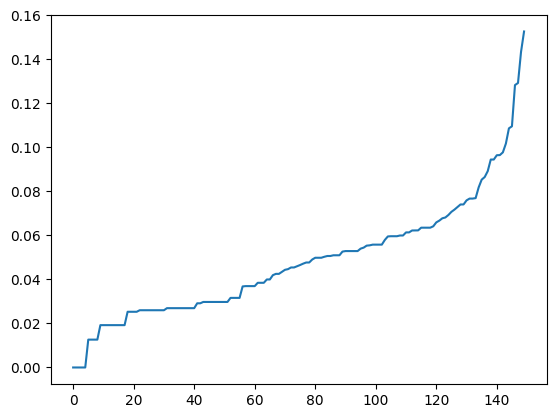

In [190]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

# min_samples = 5
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(compounds_scaled.to_numpy())
distances, indices = neighbors_fit.kneighbors(compounds_scaled.to_numpy())
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

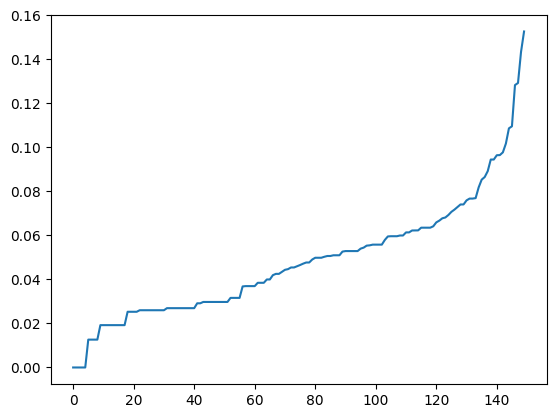

In [191]:
# min_samples = 6
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(compounds_scaled.to_numpy())
distances, indices = neighbors_fit.kneighbors(compounds_scaled.to_numpy())
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

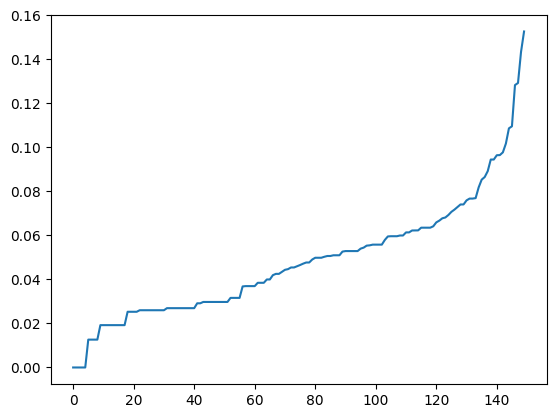

In [192]:
# min_samples = 7
neighbors = NearestNeighbors(n_neighbors=7)
neighbors_fit = neighbors.fit(compounds_scaled.to_numpy())
distances, indices = neighbors_fit.kneighbors(compounds_scaled.to_numpy())
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

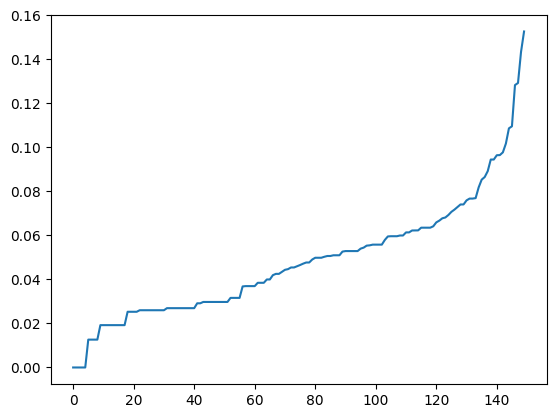

In [193]:
# min_samples = 9
neighbors = NearestNeighbors(n_neighbors=8)
neighbors_fit = neighbors.fit(compounds_scaled.to_numpy())
distances, indices = neighbors_fit.kneighbors(compounds_scaled.to_numpy())
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

## (b)

Here's the noisy moon dataset!

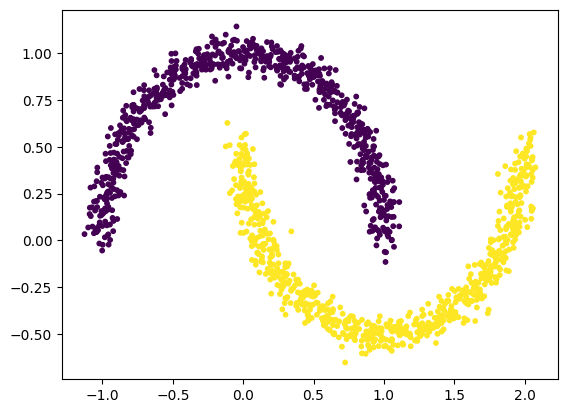

In [248]:
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from pylab import *

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
# print(noisy_moons)
X,y=noisy_moons
plt.scatter(X[:, 0], X[:, 1], s=10,c=y)

(1500,)

Text(0.5, 1.0, 'Noisy Moons Clustering Using KMeans = 2')

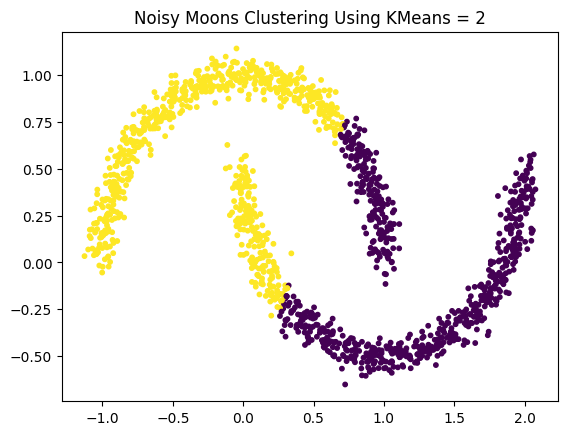

In [249]:
noisy_moons_kmeans = kmeans_2.cluster(X)
display(noisy_moons_kmeans.shape)
y.shape
plt.scatter(X[:, 0], X[:, 1], s=10,c=noisy_moons_kmeans)
plt.title("Noisy Moons Clustering Using KMeans = 2")

Optimize Epsilon for min_samples = 4

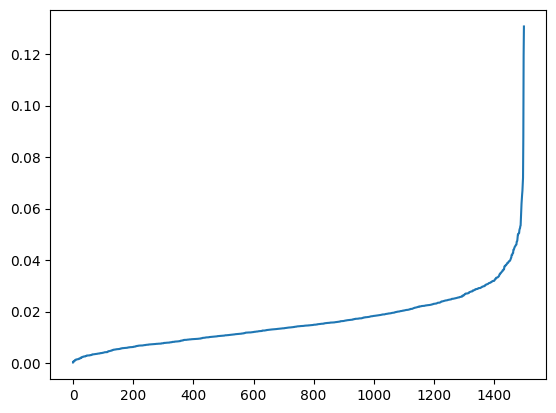

In [250]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

array([0, 1, 0, ..., 0, 0, 1])

Estimated number of clusters: 2
Estimated number of noise points: 12
Estimated number of core points: 1469
Estimated number of border points: -1331


Text(0.5, 1.0, 'Noisy Moons Clustering Using DBSCAN')

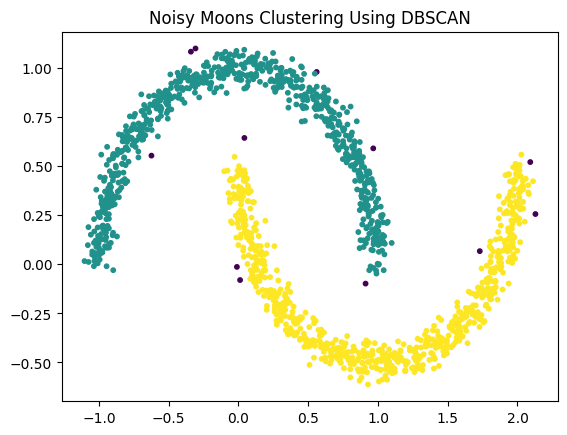

In [265]:
db_moon = DBSCAN(eps=0.07, min_samples=4)
db_moon.fit(X)
display(db_moon.labels_)

labels = db_moon.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_core = len(db_moon.core_sample_indices_)
n_border = len(compounds_scaled) - n_core - n_noise_

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Estimated number of core points: {n_core}")
print(f"Estimated number of border points: {n_border}")
plt.scatter(X[:, 0], X[:, 1], s=10,c=db_moon.labels_)
plt.title("Noisy Moons Clustering Using DBSCAN")

Run # 2 

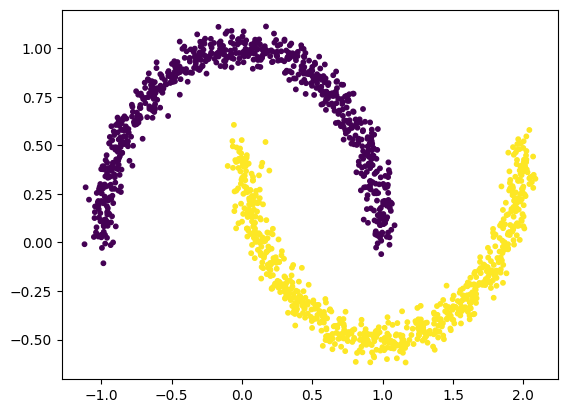

In [266]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
# print(noisy_moons)
X,y=noisy_moons
plt.scatter(X[:, 0], X[:, 1], s=10,c=y)

Text(0.5, 1.0, 'Noisy Moons Clustering Using KMeans = 2')

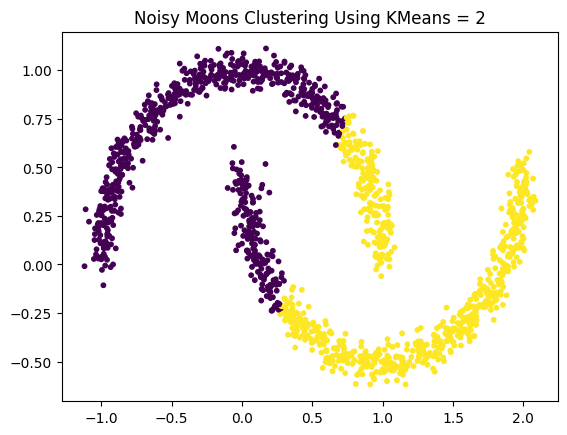

In [267]:
noisy_moons_kmeans = kmeans_2.cluster(X)
plt.scatter(X[:, 0], X[:, 1], s=10,c=noisy_moons_kmeans)
plt.title("Noisy Moons Clustering Using KMeans = 2")

array([0, 0, 0, ..., 0, 1, 0])

Estimated number of clusters: 2
Estimated number of noise points: 8
Estimated number of core points: 1477
Estimated number of border points: -1335


Text(0.5, 1.0, 'Noisy Moons Clustering Using KMeans = 2')

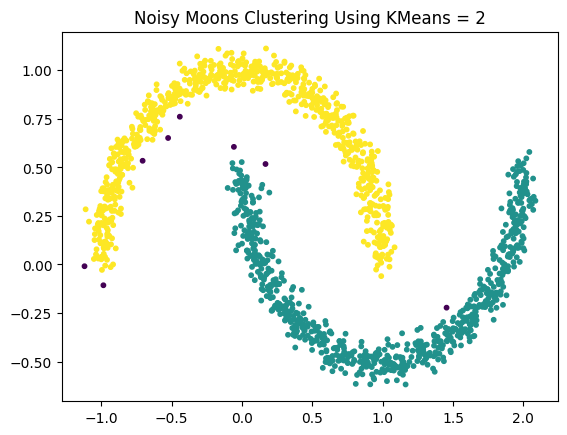

In [268]:
# db_moon = DBSCAN(eps=0.055, min_samples=4)
db_moon = DBSCAN(eps=0.07, min_samples=4)
db_moon.fit(X)
display(db_moon.labels_)

labels = db_moon.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_core = len(db_moon.core_sample_indices_)
n_border = len(compounds_scaled) - n_core - n_noise_

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Estimated number of core points: {n_core}")
print(f"Estimated number of border points: {n_border}")
plt.scatter(X[:, 0], X[:, 1], s=10,c=db_moon.labels_)
plt.title("Noisy Moons Clustering Using DBSCAN")

RUN # 3

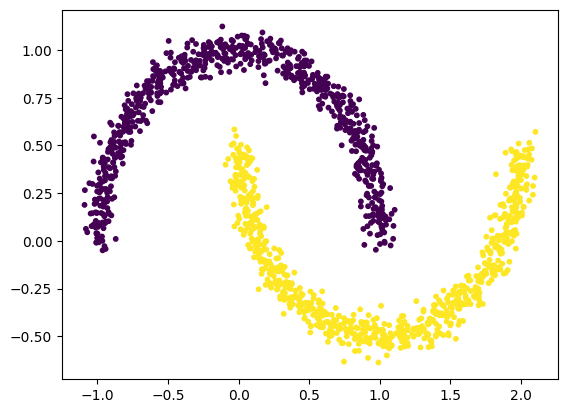

In [269]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
# print(noisy_moons)
X,y=noisy_moons
plt.scatter(X[:, 0], X[:, 1], s=10,c=y)

Text(0.5, 1.0, 'Noisy Moons Clustering Using KMeans = 2')

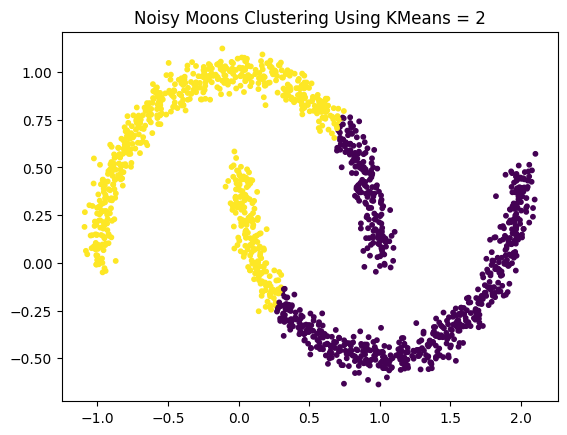

In [270]:
noisy_moons_kmeans = kmeans_2.cluster(X)
plt.scatter(X[:, 0], X[:, 1], s=10,c=noisy_moons_kmeans)
plt.title("Noisy Moons Clustering Using KMeans = 2")

array([0, 1, 1, ..., 0, 1, 1])

Estimated number of clusters: 2
Estimated number of noise points: 10
Estimated number of core points: 1473
Estimated number of border points: -1333


Text(0.5, 1.0, 'Noisy Moons Clustering Using DBSCAN')

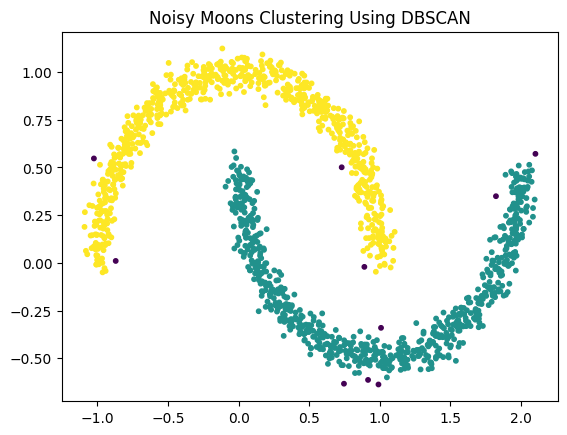

In [271]:
# db_moon = DBSCAN(eps=0.055, min_samples=4)
db_moon = DBSCAN(eps=0.07, min_samples=4)
db_moon.fit(X)
display(db_moon.labels_)

labels = db_moon.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_core = len(db_moon.core_sample_indices_)
n_border = len(compounds_scaled) - n_core - n_noise_

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Estimated number of core points: {n_core}")
print(f"Estimated number of border points: {n_border}")
plt.scatter(X[:, 0], X[:, 1], s=10,c=db_moon.labels_)
plt.title("Noisy Moons Clustering Using DBSCAN")

DBSCAN works much better in classifying the noisy moons. KMeans incorrectly classifies half of each moon as the opposite cluster, whereas DBSCAN properly classifies both moons and also identifies some outliers.

# Question 3

### (a)

In [276]:
compounds.head()

,A,B,C,D,type,Start assignment
0,6.4,2.9,4.3,1.3,amide,1
1,5.7,4.4,1.5,0.4,phenol,2
2,6.7,3.0,5.2,2.3,ether,0
3,5.8,2.8,5.1,2.4,ether,1
4,6.4,3.2,5.3,2.3,ether,0


In [280]:
compound_features = compounds.drop(['type', 'Start assignment'], axis=1)
compound_features.head()

,A,B,C,D
0,6.4,2.9,4.3,1.3
1,5.7,4.4,1.5,0.4
2,6.7,3.0,5.2,2.3
3,5.8,2.8,5.1,2.4
4,6.4,3.2,5.3,2.3


In [284]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(compound_features)
normalized_features = scaler.transform(compound_features)
normalized_features

array([[ 6.74501145e-01, -3.56360566e-01,  3.07833011e-01,
         1.33225943e-01],
       [-1.73673948e-01,  3.11468391e+00, -1.28440670e+00,
        -1.05003079e+00],
       [ 1.03800476e+00, -1.24957601e-01,  8.19624347e-01,
         1.44795564e+00],
       [-5.25060772e-02, -5.87763531e-01,  7.62758643e-01,
         1.57942861e+00],
       [ 6.74501145e-01,  3.37848329e-01,  8.76490051e-01,
         1.44795564e+00],
       [-1.26418478e+00, -1.24957601e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.14301691e+00, -1.28197243e+00,  4.21564419e-01,
         6.59117823e-01],
       [ 1.28034050e+00,  1.06445364e-01,  7.62758643e-01,
         1.44795564e+00],
       [ 3.10997534e-01, -5.87763531e-01,  5.35295827e-01,
         1.75297293e-03],
       [ 7.95669016e-01, -1.24957601e-01,  8.19624347e-01,
         1.05353673e+00],
       [ 7.95669016e-01, -5.87763531e-01,  4.78430123e-01,
         3.96171883e-01],
       [ 2.12851559e+00, -1.24957601e-01,  1.61574420e+00,
      

Using Scikit-Learn's standard scaler does the normalization for us! 

### (b)

In [289]:
 # For every centroid
centroids = []
for i in range(3):
    
    # Find the input_points that are assigned to this centroid
    assigned = normalized_features[compounds['Start assignment'].to_numpy() == i]
    
    # Recalculate the centroid to be the mean of the features of the assigned data points
    # Axis = 0 because we want the mean along the rows, or the mean of the columns (the features)
    centroids.append(np.mean(assigned, axis = 0))

centroids

[array([-0.03311922, -0.05553671, -0.0083403 ,  0.0385654 ]),
 array([0.10985887, 0.04165253, 0.10425379, 0.09115459]),
 array([-0.07673965,  0.01388418, -0.09591349, -0.12972   ])]

The 3 centroids coordinates are shown above

In [319]:
 
def calculate_centroids(centroid_assignments):
    centroids = []
    # For every centroid
    for i in range(3):
        
        # Find the input_points that are assigned to this centroid
        assigned = normalized_features[centroid_assignments == i]
        
        # Recalculate the centroid to be the mean of the features of the assigned data points
        # Axis = 0 because we want the mean along the rows, or the mean of the columns (the features)
        centroids.append(np.mean(assigned, axis = 0))

    return centroids

calculate_centroids(compounds['Start assignment'].to_numpy())

[array([-0.03311922, -0.05553671, -0.0083403 ,  0.0385654 ]),
 array([0.10985887, 0.04165253, 0.10425379, 0.09115459]),
 array([-0.07673965,  0.01388418, -0.09591349, -0.12972   ])]

## (c)

*For debugging: should be 596.4585801741025*

In [316]:
cost = 0

for i in range(3):
    
    # Find the input_points that are assigned to this centroid
    assigned = normalized_features[compounds['Start assignment'].to_numpy() == i]
    
    cost += np.sum(np.sum(np.square(assigned - centroids[i]), axis=1))

cost

# cluster1 = normalized_features[compounds['Start assignment'].to_numpy() == 1]

# cluster1

596.4585801741024

In [317]:
# # For every centroid
# for i in range(self.K):
    
#     # Find the input_points that are assigned to this centroid
#     assigned = input_points[new_assignments == i]
    
#     # Recalculate the centroid to be the mean of the features of the assigned data points
#     # Axis = 0 because we want the mean along the rows, or the mean of the columns (the features)
#     centroids[i] = np.mean(assigned, axis = 0)
#     # print(centroids)
            

def cost(data, centroids, clusters):
    cost = 0

    for i in range(len(centroids)):
        
        # Find the input_points that are assigned to this centroid
        assigned = data[clusters == i]
        cost += np.sum(np.sum(np.square(assigned - centroids[i]), axis=1))
        
    return cost

In [318]:
cost(normalized_features, centroids, compounds['Start assignment'])

596.4585801741024

## (d)

*For debugging*: 
+ Cooling schedule should be like: `array([500. , 499.5, 499.0005, ..., 3.37065784, 3.36728719, 3.3639199])`
+ Cost function can drop to around 540 (or even smaller).

In [327]:
# If you feel the code is slow in Q3(d), use numba to accelerate it
import numba

@numba.njit()
def cost_func(features, centroids, clusters):
    """
    Parameters
    ----------
    features: np.ndarray
        Feature matrix, shape (n_samples, n_features). In the compound dataset, n_features = 4.
    centroids: np.ndarray
        Centroids of each cluster, shape (n_cluster, n_features). In this question, n_cluster = 3.
    clusters: np.ndarray
        Cluster which each datapoint belongs to. shape (n_samples,)
    """
    cost = 0

    for i in range(len(centroids)):
        
        # Find the input_points that are assigned to this centroid
        assigned = features[clusters == i]
        cost += np.sum(np.sum(np.square(assigned - centroids[i]), axis=1))
        
    return cost

In [ ]:
cost_func(normalized_features, centroids, compounds['Start assignment'])

In [324]:
def SA(features, cluster, schedule, report_interval=100):
    """
    Simulated Annealing for clustering
    
    Parameters
    ----------
    features: numpy.ndarray
        Feature matrix. shape (n_samples, n_features)
    cluster: numpy.ndarray
        Initial guess of clusters. shape (n_samples,)
    schedule: numpy.ndarray
        Cooling schedule.
    report_interval: int
        Interval of steps to report result
    
    Returns
    ------
    res: dict
        Result containing the best clustering with the cost function value
    """
    # calculate the centroids
    centroids = calculate_centroids(compounds['Start assignment'].to_numpy())
    # calulate the cost fucntion
    cluster_eval = cost(features, centroids, cluster)
    
    best_cluster = cluster.copy()
    lowest_eval = cluster_eval

    for step, temp in enumerate(schedule):
        if step % report_interval == 0:
            print(step, temp, lowest_eval)
        for n in range(features.shape[0]):
            trial = cluster.copy()
            # Do a Metroplis step by swtiching a sample to differenct cluster
            choices = [0, 1, 2]
            choices.remove(trial[n]) # remove the current cluster
            rand_choice = np.random.choice(choices) # choose a different cluster
            trial[n] = rand_choice # switch the cluster
            
            # calculate the centroids & cost function
            trial_centroids = calculate_centroids(trial)
            trial_eval = cluster_eval = cost(features, trial_centroids, trial)
            # Metroplis rule
            if np.exp(-(trial_eval-cluster_eval)/temp) > np.random.random():
                cluster = trial
                cluster_eval = trial_eval
                if trial_eval < lowest_eval:
                    best_cluster = cluster.copy()
                    lowest_eval = cluster_eval
                    
    return {"solution": best_cluster, "evaluation": lowest_eval}

In [325]:
def geometric_cooling(init_temp, num_steps, alpha):
    return np.array([(alpha ** n) * init_temp for n in range(0, num_steps)])

cooling_sched = geometric_cooling(500, 5000, 0.999)
cooling_sched

In [326]:
for i in range(3):
    print(f"## Trial {i} ##")
    res = SA(normalized_features, compounds['Start assignment'], cooling_sched)['solution']
    validate(res, actual_classes)

## Trial 0 ##
0 500.0 596.4585801741024
100 452.39607355685445 542.8041143583248
200 409.3244147393178 542.8041143583248
300 370.3535160780496 542.8041143583248
400 335.09295300337004 542.0683557580196
500 303.18947243059233 542.0683557580196
600 274.32345374274837 542.0683557580196
700 248.20570671554947 542.0683557580196
800 224.57457430503754 542.0683557580196
900 203.1933112726021 542.0683557580196
1000 183.84771238548186 542.0683557580196
1100 166.34396643120374 540.3544334449798
1200 150.50671454669956 540.3544334449798
1300 136.17729340973838 540.3544334449798
1400 123.21214569233075 540.3544334449798
1500 111.48138185145105 537.9097150787688
1600 100.86747884857766 537.9097150787688
1700 91.26410276135121 534.2512169341626
1800 82.57504349184913 534.2512169341626
1900 74.71325089899808 534.2512169341626
2000 67.59996269874972 521.5488126346675
2100 61.163915395008395 521.5488126346675
2200 55.34063033613088 521.5488126346675
2300 50.071767744453915 521.5488126346675
2400 45.304